##### Copyright 2018 The TensorFlow Authors.

In [ ]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

###Modifications by Erik Mayer

##References


1. YouTube, 3Blue1Brown, Neural Networks series, https://youtube.com/playlist?list=PLZHQObOWTQDNU6R1_67000Dx_ZCJB-3pi&si=fqM7H0bVfvmy7dLV
2. Tinker With a Neural Network Right Here in Your Browser, https://playground.tensorflow.org/
3. Keras, https://keras.io/
4. Udacity, Intro to TensorFlow for Deep Learning, https://www.udacity.com/course/intro-to-tensorflow-for-deep-learning--ud187
5. Doulos, Practical Deep Learning Online, https://www.doulos.com/training/ai-and-deep-learning/deep-learning/practical-deep-learning-online/



##Acknowledgements
* This research was supported in part by Kansas National Space Grant College
and Fellowship Program – Opportunities in NASA STEM FY 2020-2024
* “This material is based upon work supported by the National Aeronautics and
Space Administration under Grant No. 80NSSC20M0109. Any opinions, findings,
and conclusions or recommendations expressed in this material are those of the
author(s) and do not necessarily reflect the views of the National Aeronautics
and Space Administration nor of Wichita State University."
* Thanks for the support of Artificial Intelligence (AI) Curriculum Committe

# Classifier
##The neural networks in this notebook will take points on the x-y plane and classify them into two categories.

Links below are to notebooks for neural networks that perform regression (best fit curve).

<table class="tfo-notebook-buttons" align="left">
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/tensorflow/examples/blob/master/courses/udacity_intro_to_tensorflow_for_deep_learning/l02c01_celsius_to_fahrenheit.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Run in Google Colab</a>
  </td>
  <td>
    <a target="_blank" href="https://github.com/tensorflow/examples/blob/master/courses/udacity_intro_to_tensorflow_for_deep_learning/l02c01_celsius_to_fahrenheit.ipynb"><img src="https://www.tensorflow.org/images/GitHub-Mark-32px.png" />View source on GitHub</a>
  </td>
</table>

#Start Here

## Step 1: Import dependencies. Do this first. If starting over, in top menu select Runtime > Restart Runtime (Ctrl-M)

First, import TensorFlow. Here, we're calling it `tf` for ease of use. We also tell it to only display errors.

Next, import [NumPy](http://www.numpy.org/) as `np`. Numpy helps us to represent our data as highly performant lists.

In [1]:
import tensorflow as tf

In [2]:
import numpy as np
import logging
logger = tf.get_logger()
logger.setLevel(logging.ERROR)

## Step 2: Set up training data using one-hot encoding
For one-hot encoding, only one output is 1 at a time while the rest of the outputs are 0.

Run one of the training data sets below. If you switch training data, you may need to start over.


In [3]:
# Option A: OR gate
# Easy as a line can be drawn seperating the two sets of points.

#number of training vectors
num_vectors = 4
num_features = 2

#inputs (features)
input    = np.array([[0.1,0.1],[0.1,0.9],[0.9,0.1],[0.9,0.9]],  dtype=float)

#one-hot outputs (labels)
output = np.array([[0,1],[0,1],[0,1],[1,0]],  dtype=float)

In [15]:
# Option B: Exclusive-OR gate
# Medium as a line can no longer be drawn separating the two sets of points. Benchmark used to test neural networks.

#number of training vectors
num_vectors = 4
num_features = 2

#inputs
input    = np.array([[0.1,0.1],[0.1,0.9],[0.9,0.1],[0.9,0.9]],  dtype=float)

#one-hot outputs (labels)
output = np.array([[0,1],[1,0],[1,0],[0,1]],  dtype=float)

In [52]:
# Option C: Two-spiral
# Harder. Two intertwined spirals. Another benchmark used to test neural networks.

#number of training vectors
num_vectors = 24
num_features = 2

#inputs
input    = np.array([[-1.90023,0.37819],[-1.50693,1.00714],[-0.93737,1.40321],[-0.30465,1.53251],[0.28061,1.40985],[0.72932,1.09122],[0.98745,0.65962],[1.04211,0.20715],[0.91946,-0.18302],[0.67551,-0.45149],[0.38188,-0.57169],[0.10966,-0.55171],[1.90023,-0.37819],[1.50693,-1.00714],[0.93737,-1.40321],[0.30465,-1.53251],[-0.28061,-1.40985],[-0.72932,-1.09122],[-0.98745,-0.65962],[-1.04211,-0.20715],[-0.91946,0.18302],[-0.67551,0.45149],[-0.38188,0.57169],[-0.10966,0.55171]
],  dtype=float)

#one-hot outputs (labels)
output = np.array([[0.0,1.0],[0.0,1.0],[0.0,1.0],[0.0,1.0],[0.0,1.0],[0.0,1.0],[0.0,1.0],[0.0,1.0],[0.0,1.0],[0.0,1.0],[0.0,1.0],[0.0,1.0],[1.0,0.0],[1.0,0.0],[1.0,0.0],[1.0,0.0],[1.0,0.0],[1.0,0.0],[1.0,0.0],[1.0,0.0],[1.0,0.0],[1.0,0.0],[1.0,0.0],[1.0,0.0]],  dtype=float)

In [ ]:
# Option D: Add your own data

##Print training data (This can be done at any time).

In [53]:
#print training vectors
for i,c in enumerate(input):
  print("inputs: {}, outputs: {}".format(c, output[i]))

inputs: [-1.90023  0.37819], outputs: [0. 1.]
inputs: [-1.50693  1.00714], outputs: [0. 1.]
inputs: [-0.93737  1.40321], outputs: [0. 1.]
inputs: [-0.30465  1.53251], outputs: [0. 1.]
inputs: [0.28061 1.40985], outputs: [0. 1.]
inputs: [0.72932 1.09122], outputs: [0. 1.]
inputs: [0.98745 0.65962], outputs: [0. 1.]
inputs: [1.04211 0.20715], outputs: [0. 1.]
inputs: [ 0.91946 -0.18302], outputs: [0. 1.]
inputs: [ 0.67551 -0.45149], outputs: [0. 1.]
inputs: [ 0.38188 -0.57169], outputs: [0. 1.]
inputs: [ 0.10966 -0.55171], outputs: [0. 1.]
inputs: [ 1.90023 -0.37819], outputs: [1. 0.]
inputs: [ 1.50693 -1.00714], outputs: [1. 0.]
inputs: [ 0.93737 -1.40321], outputs: [1. 0.]
inputs: [ 0.30465 -1.53251], outputs: [1. 0.]
inputs: [-0.28061 -1.40985], outputs: [1. 0.]
inputs: [-0.72932 -1.09122], outputs: [1. 0.]
inputs: [-0.98745 -0.65962], outputs: [1. 0.]
inputs: [-1.04211 -0.20715], outputs: [1. 0.]
inputs: [-0.91946  0.18302], outputs: [1. 0.]
inputs: [-0.67551  0.45149], outputs: [1. 

##Plot training data that uses one-hot encoding (This can be done at any time).

<function matplotlib.pyplot.show(close=None, block=None)>

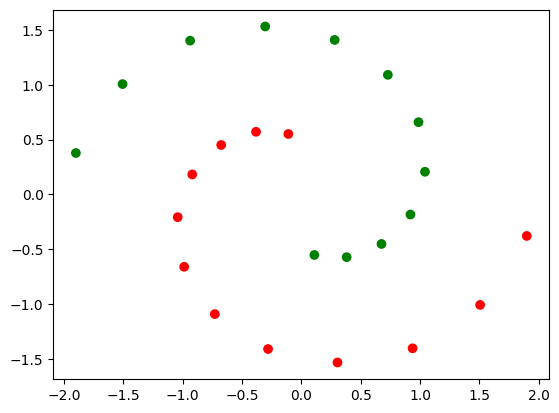

In [54]:
#plot data (for up to three categories)
import matplotlib.pyplot as plt

c=[None for i in range(num_vectors)]
for i in range(num_vectors):
  ix=np.argmax(output[i,:])
  c[i]=('r','g','b')[ix]

plt.scatter(input[:,0],input[:,1],color=c)
plt.show


##Step 3 (optional) Normalize input data between -1 and 1. Sometimes helps with training. After running this cell, you can plot the training data using above cell to see the change in training data.

In [36]:
# Normalize input data between -1 and 1
# make mean = 0
input = input - np.mean(input, axis=0)
# normalize by dividing by maximum value
input = input / np.max(input, axis=0)



##Step 4 Choose one of the neural networks below.  
If you switch options, you may need to start over.

### Option A: Single-layer neural network


In [19]:
# Create the layer with 2 inputs and 2 neurons with softmax activation functions (good for classification)
l0 = tf.keras.layers.Dense(units=2, input_shape=(2,), activation = 'softmax')
# Assemble the layer into the model
model = tf.keras.Sequential([l0])
# Compile the model, with loss and optimizer functions (categorical_crossentropy is good for classification)
model.compile(loss='categorical_crossentropy',
              optimizer=tf.keras.optimizers.Adam(0.1),metrics=['accuracy'])

### Option B: Neural network with two middle layers and one output layer

In [27]:
# Create the first middle layer with 2 inputs and 10 neurons with ReLU activation functions
l0 = tf.keras.layers.Dense(units=10, input_shape=(2,), activation = 'relu')
# Create the second middle layer with 10 neurons with ReLU activation functions
l1 = tf.keras.layers.Dense(units=10, activation = 'relu')
# Create the output layer with 2 neurons with softmax activation functions (good for classification)
l2 = tf.keras.layers.Dense(units=2, activation = 'softmax')
# Assemble the layers into the model
model = tf.keras.Sequential([l0, l1, l2])
# Compile the model, with loss and optimizer functions (categorical_crossentropy is good for classification)
model.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(0.1),metrics=['accuracy'])

### Option C: Create your own neural network

##Show the neural network layers (can run anytime after compiling the neural network).

In [49]:
# Display neural network
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 10)                30        
                                                                 
 dense_3 (Dense)             (None, 10)                110       
                                                                 
 dense_4 (Dense)             (None, 2)                 22        
                                                                 
Total params: 162 (648.00 Byte)
Trainable params: 162 (648.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## Show the layer weights and biases (can run anytime after compiling the model). Compare the weights before and after training the neural network.


In [51]:
print("Weights and biases:")
for layer in model.layers:
  print(layer.name)
  print(layer.get_weights())

Weights and biases:
dense_2
[array([[ 0.4834568 ,  0.97287536,  2.238994  ,  1.3621663 , -0.9934672 ,
        -0.81759095,  1.1207184 ,  0.5345358 , -1.8766278 ,  1.421942  ],
       [-3.390769  ,  2.292764  , -1.0772135 , -3.2739868 ,  0.8094766 ,
         2.2612793 , -1.2560236 , -1.6545006 ,  1.6219877 , -3.5672216 ]],
      dtype=float32), array([-1.1841863, -1.1238112,  0.445278 , -1.0887042,  0.7769649,
        1.8496774, -2.6936622,  2.0355117, -0.8976062, -0.7146232],
      dtype=float32)]
dense_3
[array([[ 0.11958291,  2.4762402 , -2.237712  , -1.026804  ,  1.0725878 ,
        -2.6965048 , -3.0062556 , -0.6145155 , -0.27218455, -2.1613677 ],
       [ 0.97832596, -0.1239164 ,  1.8240616 , -0.5396022 ,  2.3653996 ,
        -2.3655562 ,  0.2463194 ,  1.893087  , -2.903968  , -1.0548801 ],
       [ 1.6077844 ,  0.84819514,  1.2103549 , -0.561197  , -1.8014288 ,
        -5.5339417 , -0.55758375,  0.8648056 , -2.491     , -1.2843657 ],
       [ 0.5973996 ,  2.8065953 , -2.380909  , 

## Show the output of the neural network for the inputs (can run anytime after compiling neural network). Compare the outputs before and after training the neural network.


In [74]:
#prints outputs of neural network
print(model.predict(input))

1/1 [==============================] - 0s 19ms/step
[[5.5760854e-22 9.9999994e-01]
 [9.7633343e-28 9.9999994e-01]
 [6.5325501e-36 9.9999994e-01]
 [1.1018103e-37 9.9999994e-01]
 [1.8481572e-30 9.9999994e-01]
 [6.6800899e-23 9.9999994e-01]
 [2.4587973e-17 9.9999994e-01]
 [5.2697863e-10 9.9999994e-01]
 [2.8144506e-01 7.1855491e-01]
 [9.9999994e-01 1.3676420e-10]
 [9.9999994e-01 8.8168093e-12]
 [9.9997431e-01 2.5593248e-05]
 [9.9999994e-01 1.4896463e-26]
 [9.9999994e-01 0.0000000e+00]
 [9.9999994e-01 0.0000000e+00]
 [9.9999994e-01 0.0000000e+00]
 [9.9999994e-01 0.0000000e+00]
 [9.9999994e-01 3.8672959e-20]
 [9.9999994e-01 4.9794320e-08]
 [9.9999648e-01 3.4288814e-06]
 [2.0126956e-02 9.7987306e-01]
 [6.9056608e-05 9.9993092e-01]
 [3.6268446e-03 9.9637318e-01]
 [9.8783362e-01 1.2166353e-02]]


In [75]:
#print inputs and neural network outputs on same line (Note: new code below needing verification)

neuraloutput = model.predict(input)
for i,c in enumerate(input):
  print("inputs: {}, outputs: {}".format(c, neuraloutput[i]))

1/1 [==============================] - 0s 20ms/step
inputs: [-1.90023  0.37819], outputs: [5.5760854e-22 9.9999994e-01]
inputs: [-1.50693  1.00714], outputs: [9.7633343e-28 9.9999994e-01]
inputs: [-0.93737  1.40321], outputs: [6.5325501e-36 9.9999994e-01]
inputs: [-0.30465  1.53251], outputs: [1.1018103e-37 9.9999994e-01]
inputs: [0.28061 1.40985], outputs: [1.8481572e-30 9.9999994e-01]
inputs: [0.72932 1.09122], outputs: [6.6800899e-23 9.9999994e-01]
inputs: [0.98745 0.65962], outputs: [2.4587973e-17 9.9999994e-01]
inputs: [1.04211 0.20715], outputs: [5.2697863e-10 9.9999994e-01]
inputs: [ 0.91946 -0.18302], outputs: [0.28144506 0.7185549 ]
inputs: [ 0.67551 -0.45149], outputs: [9.9999994e-01 1.3676420e-10]
inputs: [ 0.38188 -0.57169], outputs: [9.9999994e-01 8.8168093e-12]
inputs: [ 0.10966 -0.55171], outputs: [9.9997431e-01 2.5593248e-05]
inputs: [ 1.90023 -0.37819], outputs: [9.9999994e-01 1.4896463e-26]
inputs: [ 1.50693 -1.00714], outputs: [0.99999994 0.        ]
inputs: [ 0.9373

## Plot the categories predicted by the neural network (You can run this anytime after compiling the neural network). Note: this only plots range for normalized data. Compare the plots before and after training.

1/1 [==============================] - 0s 20ms/step


<function matplotlib.pyplot.show(close=None, block=None)>

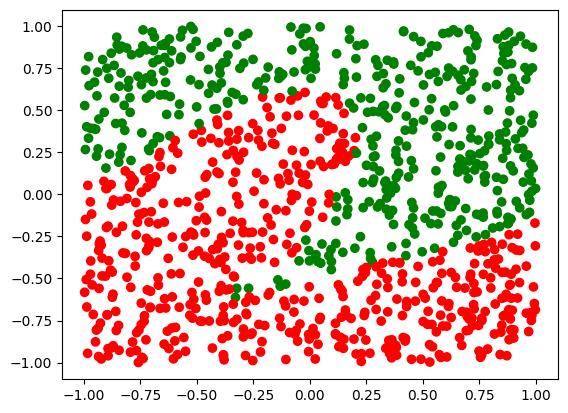

In [55]:
#Plot categories using colors

#generate random test input vectors
test_m = 1000

test_x = (np.random.random((test_m,num_features)).astype(np.float32)-0.5)*2

#get preditions for random test input vectors
prediction=model.predict(test_x,batch_size=test_m)

#initial c vector for colors
c=[None for i in range(test_m)]

#assign colors according to greatest output (for up to three categories)
for i in range(test_m):
  ix=np.argmax(prediction[i,:])
  c[i]=('r','g','b')[ix]
#  if np.any(prediction[ix]) < 0.8:
#   c[i]='y'

#plot categories using colors

import matplotlib.pyplot as plt
plt.scatter(test_x[:,0],test_x[:,1],color=c)
plt.show

## Step 5: Train the model (can run multiple times for more accuracy)


In [41]:
history = model.fit(input, output, epochs=500, verbose=True)
print("Finished training the model")

Epoch 1/500
1/1 [==============================] - 0s 13ms/step - loss: 6.0117 - accuracy: 0.4167
Epoch 2/500
1/1 [==============================] - 0s 11ms/step - loss: 2.7448 - accuracy: 0.6667
Epoch 3/500
1/1 [==============================] - 0s 10ms/step - loss: 1.8829 - accuracy: 0.7083
Epoch 4/500
1/1 [==============================] - 0s 10ms/step - loss: 1.1079 - accuracy: 0.6667
Epoch 5/500
1/1 [==============================] - 0s 10ms/step - loss: 0.6777 - accuracy: 0.7083
Epoch 6/500
1/1 [==============================] - 0s 11ms/step - loss: 0.6032 - accuracy: 0.6667
Epoch 7/500
1/1 [==============================] - 0s 11ms/step - loss: 0.3869 - accuracy: 0.7917
Epoch 8/500
1/1 [==============================] - 0s 11ms/step - loss: 0.5595 - accuracy: 0.6667
Epoch 9/500
1/1 [==============================] - 0s 11ms/step - loss: 0.5176 - accuracy: 0.6667
Epoch 10/500
1/1 [==============================] - 0s 9ms/step - loss: 0.5345 - accuracy: 0.7917
Epoch 11/500
1/1 [==

## Display training statistics (run after training)


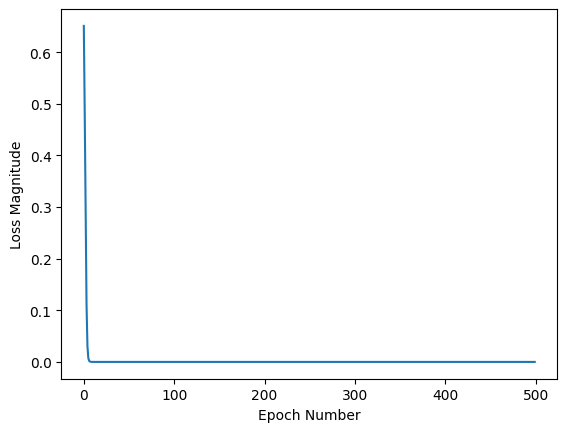

In [31]:
import matplotlib.pyplot as plt
plt.xlabel('Epoch Number')
plt.ylabel("Loss Magnitude")
plt.plot(history.history['loss'])